In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import seaborn as sns

In [2]:
housing_datasets = pd.read_csv('datasets/housing.csv')

In [3]:
housing_datasets.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing_datasets.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_datasets.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing_datasets.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [8]:
housing_datasets.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
housing_datasets.shape

(20640, 10)

In [10]:
housing_datasets.index

RangeIndex(start=0, stop=20640, step=1)

In [11]:
housing_datasets.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2447,-119.62,36.56,30.0,1722.0,372.0,1467.0,403.0,1.8878,51600.0,INLAND
7441,-118.20,33.94,45.0,1570.0,328.0,1321.0,300.0,3.7361,171800.0,<1H OCEAN
16804,-122.42,37.66,36.0,725.0,121.0,335.0,140.0,4.1250,327600.0,NEAR OCEAN
826,-122.09,37.63,36.0,1570.0,274.0,992.0,249.0,5.3644,168800.0,NEAR BAY
11699,-117.97,33.89,17.0,1740.0,445.0,1158.0,412.0,2.8649,137500.0,<1H OCEAN


In [12]:
housing_datasets = housing_datasets.dropna()

In [13]:
housing_datasets.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
housing_datasets.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

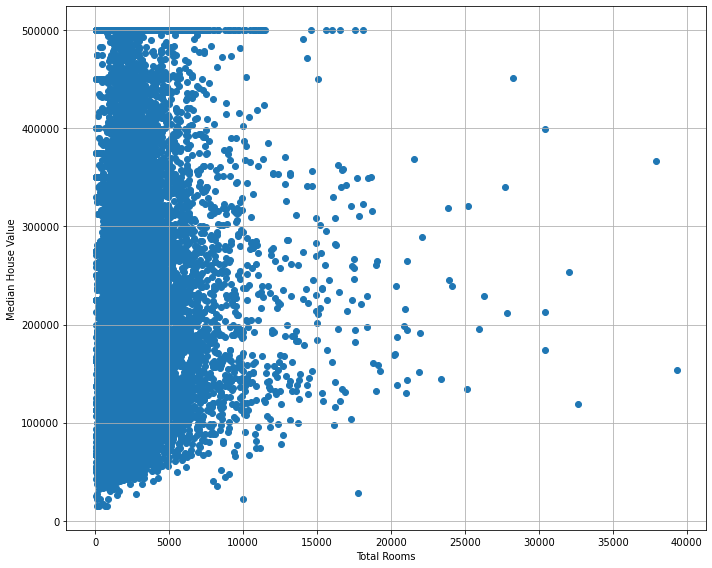

In [16]:
fig, ax = plt.subplots(figsize =  (10, 8))
plt.scatter(housing_datasets['total_rooms'], housing_datasets['median_house_value'])
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.grid(True)
plt.tight_layout()
#plt.legend(loc = 'upper right')
plt.show()

In [17]:
housing_datasets_corr = housing_datasets.corr()
housing_datasets_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


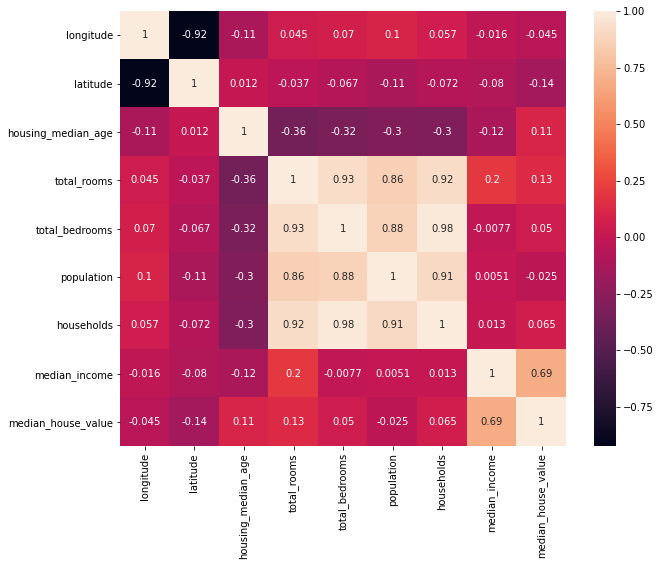

In [18]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(housing_datasets_corr, annot = True)
plt.show()

In [19]:
housing_datasets.loc[housing_datasets.median_house_value == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [20]:
housing_datasets = housing_datasets.drop(housing_datasets.loc[housing_datasets.median_house_value == 500001].index)

In [21]:
housing_datasets.shape

(19475, 10)

In [22]:
housing_datasets.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
housing_datasets = pd.get_dummies(housing_datasets, columns=['ocean_proximity'])

In [24]:
housing_datasets.shape

(19475, 14)

In [25]:
housing_datasets.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [26]:
x = housing_datasets.drop('median_house_value', axis = 1)
y = housing_datasets.median_house_value

In [27]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [29]:
model = LinearRegression(normalize= True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [30]:
print('Training Score : ', model.score(x_train, y_train))

Training Score :  0.6108309512437382


In [31]:
predictions = x_train.columns
predictions

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [32]:
coef = pd.Series(model.coef_, predictions).sort_values()
print(coef)

ocean_proximity_INLAND        -25609.372211
longitude                     -25454.227225
latitude                      -23247.042414
population                       -30.267342
total_rooms                       -6.224732
households                        36.764294
total_bedrooms                    92.608576
housing_median_age               903.672486
ocean_proximity_NEAR BAY        6193.651912
ocean_proximity_<1H OCEAN      13387.450204
ocean_proximity_NEAR OCEAN     16082.833611
median_income                  37879.111844
ocean_proximity_ISLAND        210359.484778
dtype: float64


In [33]:
y_predict = model.predict(x_test)

In [34]:
datasets_predictions_actual = pd.DataFrame({'predicted': y_predict, 'Actual':y_test})
datasets_predictions_actual.head(10)

,predicted,Actual
10089,220829.184367,215700.0
11900,239588.437086,219600.0
17915,279421.400756,270300.0
14167,192690.683153,158300.0
16547,152595.869517,121500.0
12720,144711.716189,207800.0
6135,102657.526598,145900.0
5883,271439.624943,249500.0
1918,88490.369156,127300.0
3372,226727.787732,191100.0


In [35]:
print('Mean absoulate Error :', mean_absolute_error(y_test, y_predict))
print('Mean Square Error :', mean_squared_error(y_test, y_predict))
print('R Square Error :', r2_score(y_test, y_predict))

Mean absoulate Error : 44587.220227679776
Mean Square Error : 3638999940.7410946
R Square Error : 0.6205850366811747


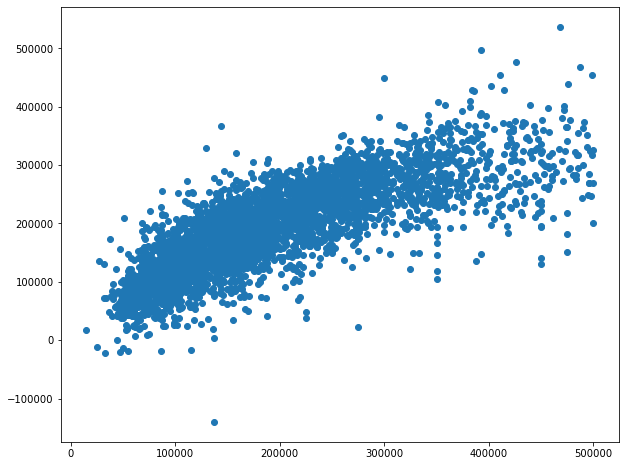

In [36]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(y_test, y_predict)
plt.show()

In [37]:
datasets_precit_actual_sample = datasets_predictions_actual.sample(100)
datasets_precit_actual_sample = datasets_precit_actual_sample.reset_index()

In [38]:
datasets_precit_actual_sample.head()

,index,predicted,Actual
0,4699,266048.023448,375000.0
1,4149,185008.527093,162000.0
2,10115,285680.920299,245000.0
3,7357,109432.361393,164200.0
4,18149,234086.964210,342400.0


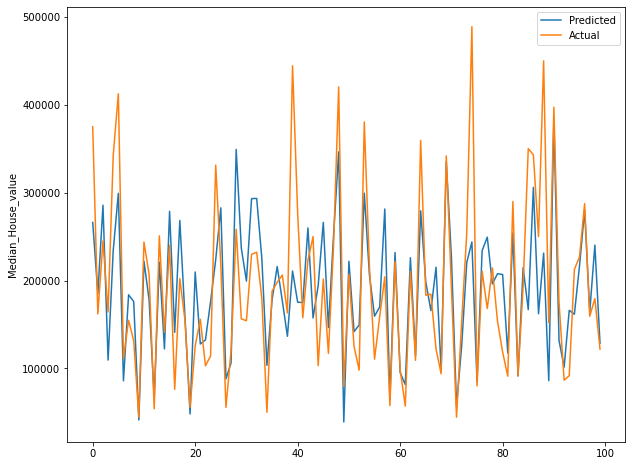

In [39]:
plt.figure(figsize = (10, 8))
plt.plot(datasets_precit_actual_sample['predicted'], label = 'Predicted')
plt.plot(datasets_precit_actual_sample['Actual'], label = 'Actual')
plt.ylabel('Median_House_value')
plt.legend()
plt.show()

In [40]:
median_datasets = housing_datasets.median_house_value.median()

In [41]:
housing_datasets['above_median'] = (housing_datasets['median_house_value'] - median_datasets) > 0

In [42]:
housing_datasets.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,above_median
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,True


In [43]:
x = housing_datasets.drop(['median_house_value', 'above_median'], axis = 1)
y = housing_datasets['above_median']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [45]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
print('Training Score : ', model.score(x_train, y_train))

Training Score :  0.8222721437740693


In [47]:
y_predict = model.predict(x_test)

In [48]:
datasets_precit_actual = pd.DataFrame({'Prdicted':y_predict, 'Actual':y_test})
datasets_precit_actual.head()

,Prdicted,Actual
17566,True,True
18639,True,True
4695,True,True
11123,True,False
417,True,True


In [49]:
print('Accuracy  :', accuracy_score(y_test, y_predict))

Accuracy  : 0.812836970474968
